In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

sns.set_style(style='white')
sns.set_context(context ='paper')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='font/NanumSquareRoundR.ttf').get_name()
rc('font', family=font_name)

font_path = 'font/NanumSquareRoundR.ttf'
fontprop = font_manager.FontProperties(fname=font_path)

pd.set_option('display.max_columns',999)

In [2]:
product = pd.read_csv('data/Product.csv')
search1 = pd.read_csv('data/Search1.csv')
search2 = pd.read_csv('data/Search2.csv')
session = pd.read_csv('data/Session.csv')
master = pd.read_csv('data/Master.csv')
custom = pd.read_csv('data/Custom.csv')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA

## 1-1 . 데이터 이해

### NA 값

In [19]:
# session 만 na 값 존재
session.isnull().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

### product

In [7]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [14]:
product[lambda x : x.SESS_ID == 6526651]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TO
647279,4140076,6526651,22,196272,색상:선택3)248(네이비)|사이즈:L(105) / 1개,프레드페리,47600,1,47600
783221,4140076,6526651,193,196272,색상:선택2)102(블랙)|사이즈:XL(110) / 1개,프레드페리,47600,1,47600
844514,4140076,6526651,22,365025,색상:WH|사이즈:165 / 1개,닥스 키즈,48300,1,48300
1667666,4140076,6526651,22,364992,색상:BG|사이즈:165 / 1개,닥스 키즈,71200,1,71200
2290388,4140076,6526651,22,339321,색상:BU|사이즈:165 / 1개,닥스 키즈,90300,1,90300
3924326,4140076,6526651,193,507637,색상:블랙(BLK)|사이즈:XXL / 1개,게스(VIP),23800,1,23800
4310534,4140076,6526651,193,262956,사이즈:280 / 1개,나이키,29000,1,29000


In [16]:
session[lambda x : x.SESS_ID == 6526651]

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,DAY
1464501,4140076,6526651,272,20180613,192.0,2147.0,mobile,Seoul,Seoul,06,13


In [7]:
print('all:',len(product))
print('CLNT_ID:',len(product.CLNT_ID.unique()))
print('SESS_ID:',len(product.SESS_ID.unique()))

all: 5024906
CLNT_ID: 922737
SESS_ID: 2425886


### search

In [31]:
print('search1 :', len(search1))
print('CLNT_ID:',len(search1.CLNT_ID.unique()))
print('SESS_ID:',len(search1.SESS_ID.unique()))
print('search2 :', len(search2))

search1 : 2884943
CLNT_ID: 511477
SESS_ID: 1160589
search2 : 8051172


In [28]:
search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [6]:
# 월별 insight , 날짜가 있으므로 해당 날짜의 날씨 등등
search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


In [21]:
search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT,month,day
0,20180407,닥스원피스,8,04,07
1,20180407,닥터지 브라이트닝,1,04,07
2,20180407,달팡 인트랄,2,04,07
3,20180407,대상트,1,04,07
4,20180407,더블유닷,6,04,07


### session

In [7]:
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


In [33]:
product[lambda x : x.CLNT_ID == 5873599]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
2172341,5873599,6616320,104,659005,색상:2호 / 1개,조르지오 아르마니,"89,000",1
3718322,5873599,8641867,65,370753,색상:선택(04) 기본체크 4번 세트 / 1개,닥스(손수건),"20,000",1
3729781,5873599,8641867,65,370753,색상:선택(09) 81번 세트 / 1개,닥스(손수건),"20,000",1
3736859,5873599,8641867,65,370753,색상:선택(10) 82번 세트 / 1개,닥스(손수건),"20,000",1
4661967,5873599,5886172,40,809194,색상:리질리언트 루즈 / 1개,맥,"34,000",1


In [34]:
session[lambda x : x.CLNT_ID == 5873599]

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon


In [30]:
print('all:',len(session))
print('CLNT_ID:',len(session.CLNT_ID.unique()))
print('SESS_ID:',len(session.SESS_ID.unique()))

all: 2712907
CLNT_ID: 922737
SESS_ID: 2425886


### custom

In [32]:
print('all:',len(custom))
print('CLNT_ID:',len(custom.CLNT_ID.unique()))

all: 671679
CLNT_ID: 671679


In [9]:
custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


### master

In [8]:
master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


## 1-2 . 데이터 전처리

In [3]:
# product 이상치 제거
product = product[lambda x : x.HITS_SEQ != 1]

In [4]:
# 똑같은 row 지우기
product.drop_duplicates(inplace = True)
session.drop_duplicates(inplace = True)
search1.drop_duplicates(inplace = True)
search2.drop_duplicates(inplace = True)
master.drop_duplicates(inplace = True)
custom.drop_duplicates(inplace = True)

In [5]:
# str을 int로 !
def str_to_int(x):
    if type(x) == str:
        return int(''.join(x.split(',')))
    else: return x

product['PD_BUY_AM'] = product.PD_BUY_AM.map(str_to_int)
session['TOT_SESS_HR_V'] = session.TOT_SESS_HR_V.map(str_to_int)

In [6]:
# search2 컬럼 추가
def month(x):
    return str(x)[4:6]
def day(x):
    return str(x)[6:]

search2['MONTH'] = search2.SESS_DT.map(month)
search2['DAY'] = search2.SESS_DT.map(day)

session['MONTH'] = session.SESS_DT.map(month)
session['DAY'] = session.SESS_DT.map(day)

In [104]:
# na 값
session.isnull().sum() / len(session) *100
# 이정도면 dropna 해도 될듯
# 아니면 모델로 예측 or 평균 대입

CLNT_ID            0.000000
SESS_ID            0.000000
SESS_SEQ           0.000000
SESS_DT            0.000000
TOT_PAG_VIEW_CT    0.010100
TOT_SESS_HR_V      0.523497
DVC_CTG_NM         0.000000
ZON_NM             0.000000
CITY_NM            0.000000
MONTH              0.000000
DAY                0.000000
dtype: float64

## 1-3. 데이터 탐색

In [44]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,6158159,85,179538,(not set),[아베다],39000,1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,6406509,78,190306,5개,데코르테,39000,5


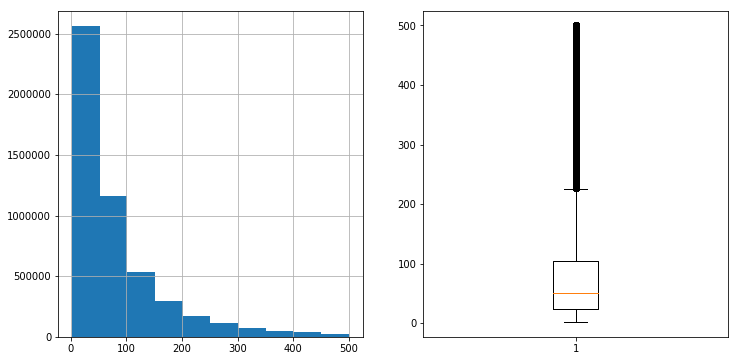

In [76]:
plt.figure(figsize = (12,6))
plt.subplot(121)
product.HITS_SEQ.hist()
plt.subplot(122)
plt.boxplot(product.HITS_SEQ)
plt.show()

In [7]:
# total 소비가격 생성
product.PD_BUY_CT = product.PD_BUY_CT.map(str_to_int)
product['PD_BUY_TO'] = product.PD_BUY_CT * product.PD_BUY_AM

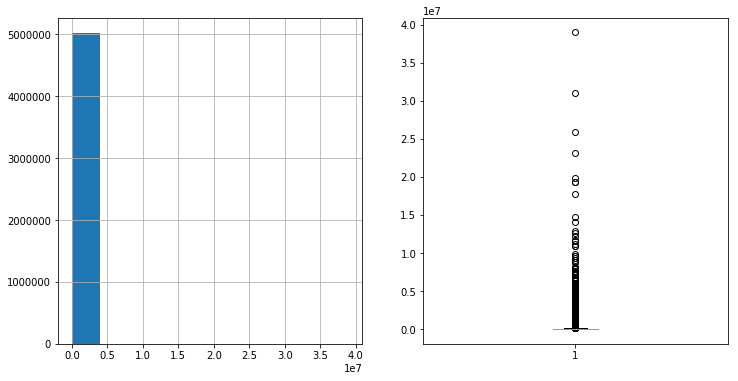

In [75]:
plt.figure(figsize = (12,6))
plt.subplot(121)
product.PD_BUY_TO.hist()
plt.subplot(122)
plt.boxplot(product.PD_BUY_TO)
plt.show()

In [8]:
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,DAY
0,5873599,8641867,9,20180509,82.0,1890.0,mobile,Daejeon,Daejeon,05,09
1,5873599,6616320,21,20180611,105.0,1604.0,mobile,Busan,Busan,06,11
2,5873599,5886172,40,20180624,41.0,632.0,mobile,Daejeon,Daejeon,06,24
3,5873884,1050889,15,20180913,160.0,1035.0,mobile,Gyeonggi-do,Anyang,09,13
4,5874461,10298270,5,20180412,13.0,298.0,mobile,Seoul,Seoul,04,12


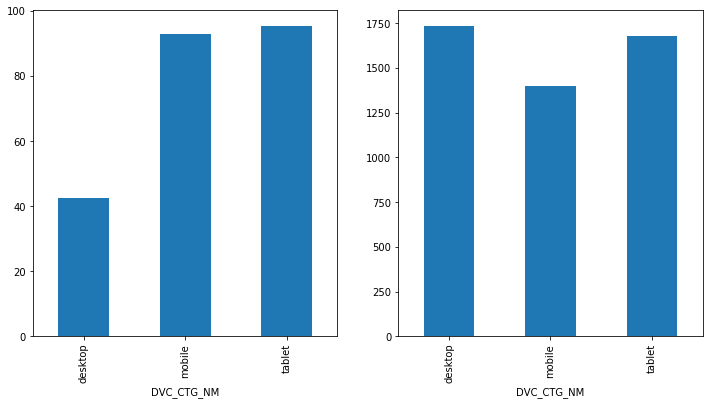

In [9]:
plt.figure(figsize = (12,6))
plt.subplot(121)
session.groupby('DVC_CTG_NM')['TOT_PAG_VIEW_CT'].mean().plot.bar()
plt.subplot(122)
session.groupby('DVC_CTG_NM')['TOT_SESS_HR_V'].mean().plot.bar()
plt.show()

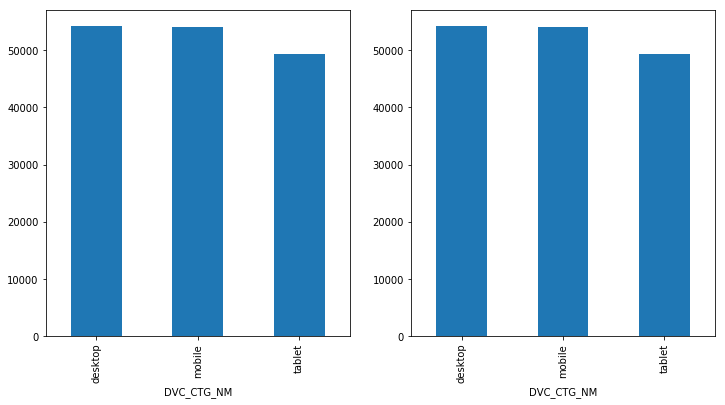

In [11]:
temp = pd.merge(product, session, on = ['CLNT_ID', 'SESS_ID'], how = 'left')
plt.figure(figsize = (12,6))
plt.subplot(121)
temp.groupby('DVC_CTG_NM')['PD_BUY_TO'].mean().plot.bar()
plt.subplot(122)
temp.groupby('DVC_CTG_NM')['PD_BUY_TO'].mean().plot.bar()
plt.show()

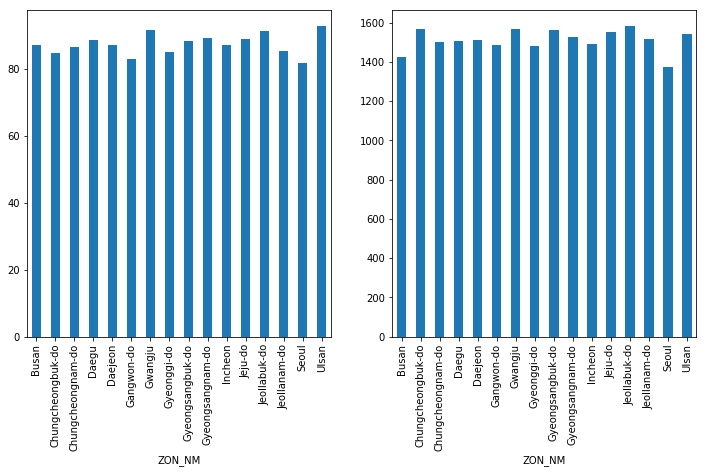

In [14]:
plt.figure(figsize = (12,6))
plt.subplot(121)
session.groupby('ZON_NM')['TOT_PAG_VIEW_CT'].mean().plot.bar()
plt.subplot(122)
session.groupby('ZON_NM')['TOT_SESS_HR_V'].mean().plot.bar()
plt.show()

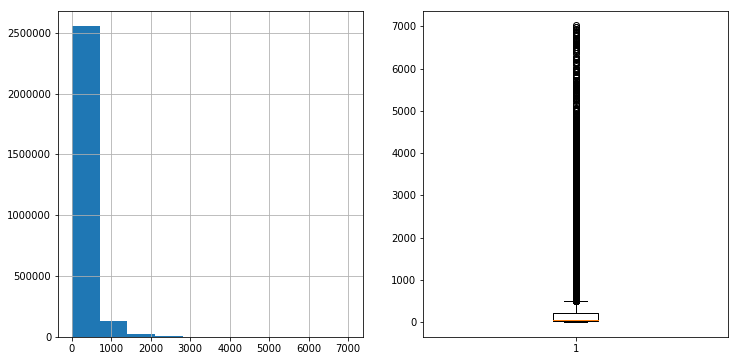

In [78]:
plt.figure(figsize = (12,6))
plt.subplot(121)
session.SESS_SEQ.hist()
plt.subplot(122)
plt.boxplot(session.SESS_SEQ)
plt.show()

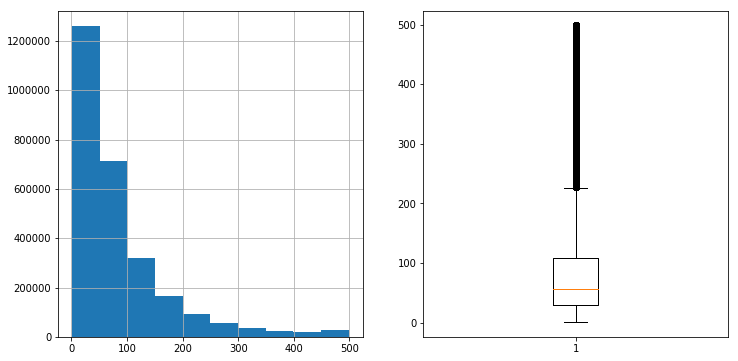

In [82]:
plt.figure(figsize = (12,6))
plt.subplot(121)
session.TOT_PAG_VIEW_CT.hist()
plt.subplot(122)
plt.boxplot(session.dropna().TOT_PAG_VIEW_CT)
plt.show()

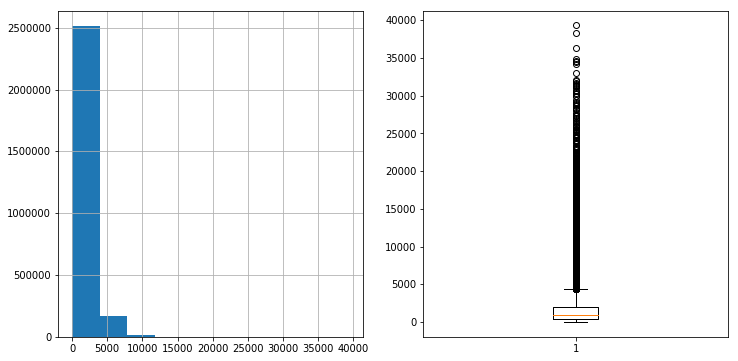

In [81]:
plt.figure(figsize = (12,6))
plt.subplot(121)
session.TOT_SESS_HR_V.hist()
plt.subplot(122)
plt.boxplot(session.dropna().TOT_SESS_HR_V)
plt.show()

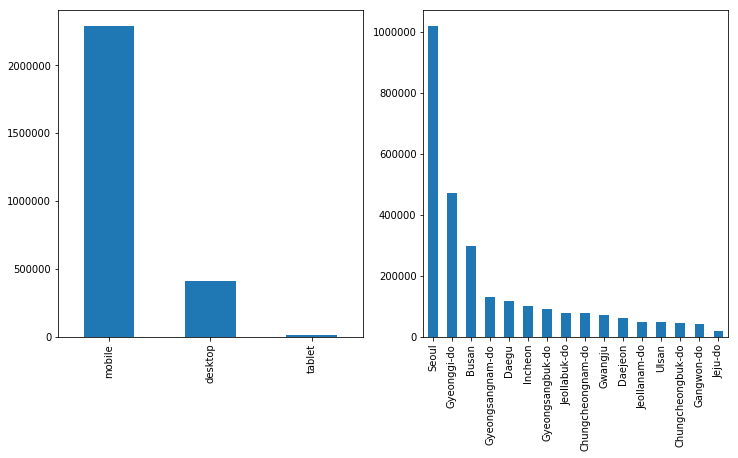

In [85]:
plt.figure(figsize = (12,6))
plt.subplot(121)
session.DVC_CTG_NM.value_counts().plot.bar()
plt.subplot(122)
session.ZON_NM.value_counts().plot.bar()
plt.show()

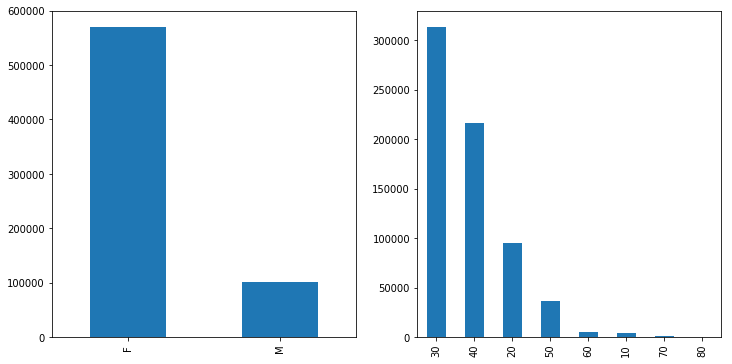

In [90]:
plt.figure(figsize = (12,6))
plt.subplot(121)
custom.CLNT_GENDER.value_counts().plot.bar()
plt.subplot(122)
custom.CLNT_AGE.value_counts().plot.bar()
plt.show()